<h1 align = 'center'> TỔNG QUAN ĐỀ TÀI </h1>
<h2 > Áp dụng giải thuật k-Means để giải quyết bài toán</h2>
    
    - Bộ dữ liệu chi tiết cuộc gọi (CDR) của 10 người, dữ liệu được thu thập trong 3 năm. Trong bộ dữ liệu có các features như: In (số gọi tới), Out (Số gọi đi), CallDate (Thời gian gọi), Duration (Thời lượng gọi),.... 
    
    - Chúng ta sẽ sử dụng giải thuật k-means để xác định xem những người này họ sống ở đâu và nơi họ làm việc.

<h3> 1)Import những thư viện cần thiết </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import kmean as km
from sklearn.cluster import KMeans
matplotlib.style.use('ggplot') 


### 3) Load dataset

In [2]:
data = pd.read_csv('CDR.csv')
data

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53183,8549533077,491169353,Missed,2013-02-26,19:11:18.125445,Tue,0:04:05.656331,6c1f0271-70e2-4ea6-bb8b-23b3b0b06117,32.772361,-96.777278
53184,8549533077,2362231379,Incoming,2013-02-26,18:01:56.075434,Tue,0:01:53.848597,a11a02cf-73c6-479c-8cf1-8fbee7917716,32.786556,-96.791250
53185,8549533077,186272563,Incoming,2013-02-26,16:08:57.602134,Tue,0:01:57.577549,06fe2702-1f88-4dfd-90d6-22c2d3227855,32.985083,-96.802556
53186,8549533077,2288700880,Incoming,2013-02-26,08:01:39.721347,Tue,0:01:39.690498,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528


### 4) Xử lý dữ liệu

In [3]:
data.dtypes

In             int64
Out            int64
Direction     object
CallDate      object
CallTime      object
DOW           object
Duration      object
TowerID       object
TowerLat     float64
TowerLon     float64
dtype: object

Ta thấy dữ liệu CallDate và CallTime có dạng dữ liệu không đúng định dạng

In [4]:
data["CallDate"]=pd.to_datetime(data["CallDate"])

In [5]:
data["CallTime"]=pd.to_timedelta(data["CallTime"]) 

In [6]:
data.dtypes

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

### 5) Khám phá dữ liệu

In [7]:
unique_phone_no=data["In"].unique() #Lấy ra số điện thoại của 10 người gọi đến
unique_phone_no

array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077],
      dtype=int64)

In [8]:
user1=data[data['In'] ==unique_phone_no[0]] #Lấy dữ liệu của người thứ 1 (gọi là user1)
user1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53140,4638472273,2666307251,Missed,2013-02-26,0 days 11:26:01.888502,Tue,0:03:08.177065,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389
53141,4638472273,2145623768,Missed,2013-02-26,0 days 17:32:18.776276,Tue,0:02:30.823459,78512965-e30b-4734-ae92-47b910fe3d7f,32.899944,-96.910389
53142,4638472273,4551601645,Incoming,2013-02-26,0 days 19:12:44.730636,Tue,0:03:42.954201,8fb02570-fb3f-4381-be74-3e1accf87ec5,32.750556,-96.694722
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

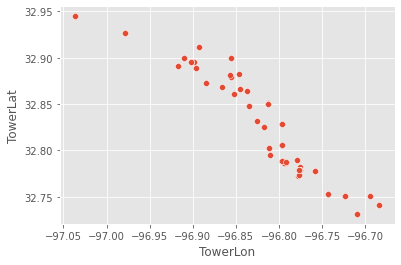

In [9]:
sns.scatterplot(data=user1, x="TowerLon", y="TowerLat") #Trực quan hóa vị trí cuộc gọi của người thứ 1

NHẬN XÉT: Biểu đồ scatter ở trên cho ta thấy được vị trí các cuộc gọi mà user1 nhận được. Ta có thể đặt ra những giả định như sau:
- Cuối tuần:
    + user1 có thể ở nhà, các cuộc gọi nhận được sẽ ở 1 vị trí cụ thể
    + Thời gian nhận cuộc gọi ở nhà có thể muộn hơn (thức khuya so với những ngày đi làm) và nhận những cuộc gọi khuya. Đồng nghĩa với việc có thể nhận cuộc trễ hơn (do dậy muộn)
- Trong tuần:
    + user1 có thể làm việc theo giờ hành chính và nhận những cuộc gọi trong thời gian này (8AM -> 17PM)
    + Có thể nhận những cuộc gọi buổi sáng.
    + Có thể nhận cuộc gọi cả ở nơi làm lẫn ở nhà.

### 6) Lập mô hình: 
#### 6-1) Ý tưởng 1: Vào những ngày cuối tuần, mọi người thường ở nhà thay vì nơi làm việc.

In [10]:
#Show dữ liệu vào ngày Sat và Sun:
user1_weekends = user1[(user1['DOW'] == 'Sat') | (user1['DOW'] == 'Sun')].copy()
user1_weekends.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

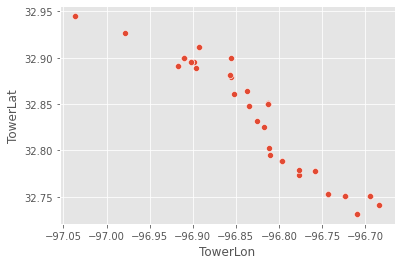

In [11]:
#Trực quan hóa dữ liệu những ngày cuối tuần:
sns.scatterplot(data=user1_weekends, x='TowerLon', y = 'TowerLat')

NHẬN XÉT:
- Ta thấy dữ liệu trải dài -> Chưa kết luận được vị trí nào là nhà (home).

=> Cụ thể hơn ta sẽ xử dụng dữ liệu vào thời gian từ 22h tối ->6h sáng (thời gian này khả năng cao các user ở nhà)

In [12]:
#show dữ liệu cuối tuần trong khoảng thời gian từ 22h tối -> 6h sáng
user1_time_call_oow = user1_weekends[(user1_weekends['CallTime'] >= '22:00:00') | (user1_weekends['CallTime'] <= '06:00:00')]
user1_time_call_oow.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,0 days 22:22:33.693878,Sat,0:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,0 days 22:21:27.466908,Sat,0:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,0 days 22:59:23.206408,Sat,0:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,0 days 05:15:40.205917,Sun,0:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,0 days 05:08:20.121145,Sat,0:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

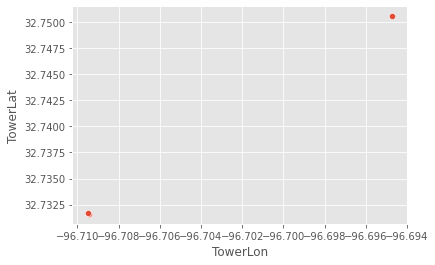

In [13]:
#Trực quan hóa cuối tuần trong khoảng thời gian từ 22h tối -> 6h sáng
sns.scatterplot(data=user1_time_call_oow, x='TowerLon', y = 'TowerLat')

Dựa vào biểu đồ trên, ta có thể thấy có 2 vị trí cụ thể xuất hiện nhiều nhất, 2 vị trí này có thể là `home location` hoặc gần `home location` của `user`, vì thời gian buổi tối cuối tuần mọi người thường ở nhà.
Ta sẽ sử dụng giải thuật K-Means trên bộ dữ liệu `user1_time_call_oow` với `K=2`

##### Trực quan hóa dữ liệu
<p> Áp dụng K-means với K=2 </p>
<p> Sau khi áp dụng giải thuật, 2 vị trí Centroid có thể là vị trí Work-Location và Home-Location </p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  2.022262734212537
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.89725753 -96.90470092]
    #Số lượng  2021

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73670309 -96.71403501]
    #Số lượng  1627


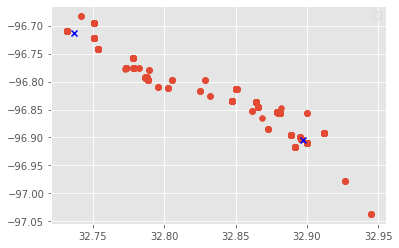

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  2.536088255598434
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.69997899 -96.93403247]
    #Số lượng  6664

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.8697266  -96.92288527]
    #Số lượng  4969


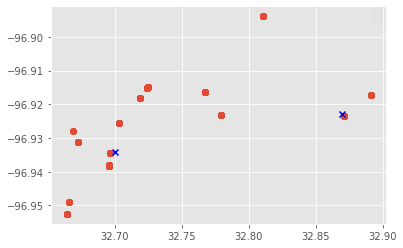

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.1988597391338064
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.86357133 -96.86643342]
    #Số lượng  1286

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.78195472 -96.89310902]
    #Số lượng  1610


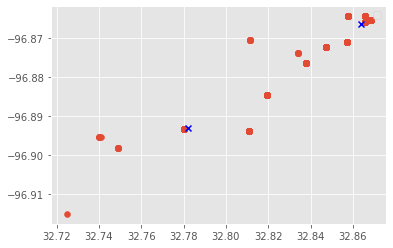

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.011290729481902186
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.84671395 -96.83518329]
    #Số lượng  1134

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.8541588  -96.84741331]
    #Số lượng  1363


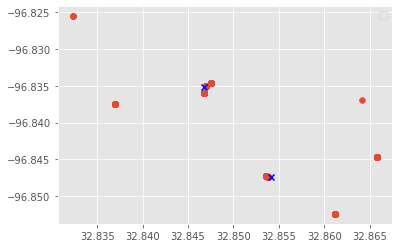

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.05286466998056459
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.92125161 -96.75668579]
    #Số lượng  1660

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.87499931 -96.73034439]
    #Số lượng  1205


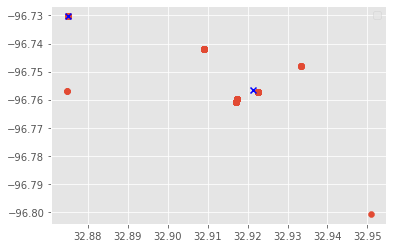

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.5977979311292797
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.77196035 -96.69242465]
    #Số lượng  699

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.81102081 -96.86547112]
    #Số lượng  911


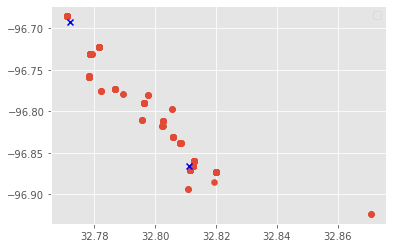

Cluster Analysis Inertia:  0.3408927579753739
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.75278632 -96.74349526]
    #Số lượng  1325

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.70801142 -96.83462391]
    #Số lượng  1085


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


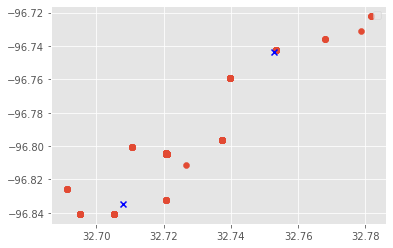

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  3.620439015855641
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.72028091 -96.82606713]
    #Số lượng  3220

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.7045021  -96.61532634]
    #Số lượng  2615


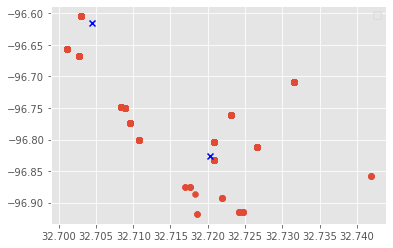

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  1.019794702234231
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.77336354 -96.81508844]
    #Số lượng  5179

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.72271798 -96.88984119]
    #Số lượng  6874


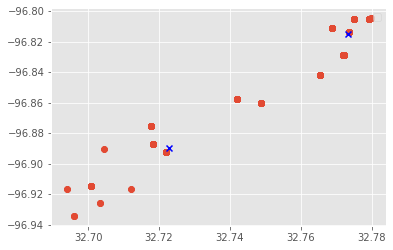

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  2.232109587602883
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.98115835 -96.80278795]
    #Số lượng  4417

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.77726672 -96.78080907]
    #Số lượng  3324


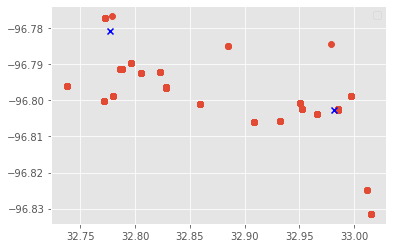

In [14]:
models = []
#TO DO:
for i in range(10):    
    user = data[data['In'] == unique_phone_no[i]].copy()
    useful_features = ['TowerLat', 'TowerLon']
    x_train = user[useful_features].copy()
    kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
    km.clusterInfo(kmeans)
    models.append(kmeans)
    centroids = kmeans.cluster_centers_
    plt.scatter(user['TowerLat'] , user['TowerLon'])
    plt.scatter(centroids[:,0] , centroids[:,1],  marker="x", color='b')
    plt.legend()
    plt.show()


#### 6-2) Thử những phương án khác
<p> - Đối với những ngày thường, user khoảng thời gian trước 17h chiều họ thường ở nơi làm việc và ở nhà 1 ít thời gian buổi sáng. </p>
<p> - Ý tưởng sẽ phân cụm trong khoảng thời gian trước 17h chiều, cluster có nhiều samples nhất có thể là Work-location còn lại là Home-lcation </p>

In [20]:
#Show dữ liệu thời gian trước 17h chiều
user1_weekdays_daytime = user1[(user1['DOW'] != 'Sat') & (user1['DOW'] != 'Sun')].copy()
user1_weekdays_daytime = user1_weekdays_daytime[(user1_weekdays_daytime['CallTime'] <= '17:00:00') ]
user1_weekdays_daytime.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,0 days 16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,0 days 15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
248,4638472273,8180005891,Missed,2010-12-29,0 days 09:13:35.198987,Wed,0:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
249,4638472273,2145623768,Incoming,2010-12-29,0 days 06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
250,4638472273,8068555700,Incoming,2010-12-29,0 days 13:54:14.724722,Wed,0:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


<AxesSubplot:xlabel='TowerLon', ylabel='TowerLat'>

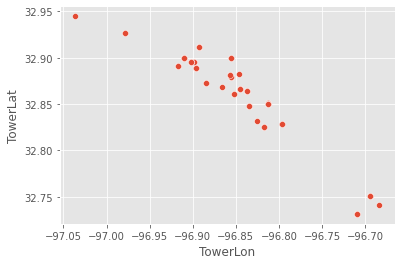

In [21]:
#Trực quan hóa dữ liệu:
sns.scatterplot(data=user1_weekdays_daytime, x='TowerLon', y = 'TowerLat')

In [22]:
#Phân cụm với k=3
model = km.doKMeans(user1_weekdays_daytime, 3)
km.clusterInfo(model)


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


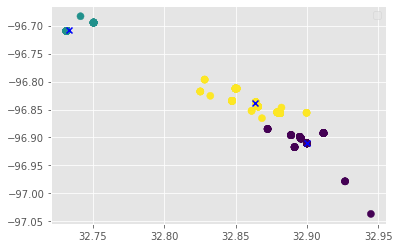

In [23]:
#Trực quan hóa dữ liệu
centers = model.cluster_centers_ #Lấy các điểm trung tâm
plt.scatter(user1_weekdays_daytime['TowerLat'] , user1_weekdays_daytime['TowerLon'], c=model.labels_, s=50, cmap='viridis')
plt.scatter(centers[:,0] , centers[:,1],  marker="x", color='b')
plt.legend()
plt.show()

### Trực quan hóa dữ liệu của từng user:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


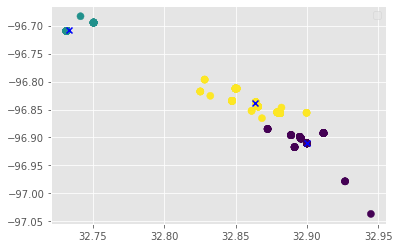

Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


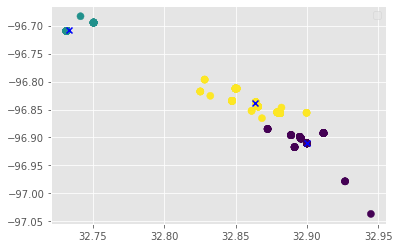

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


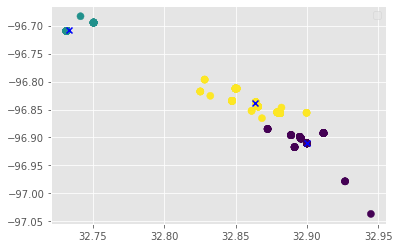

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


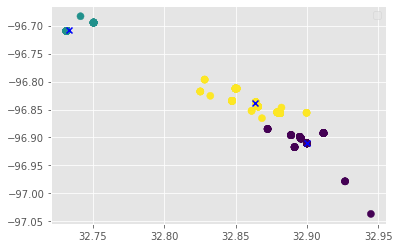

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


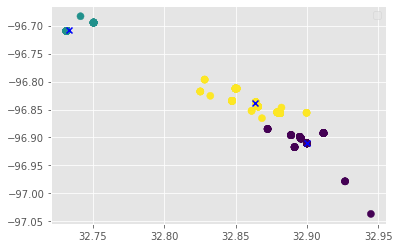

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


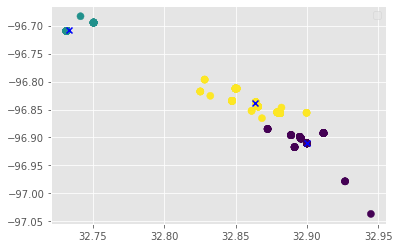

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


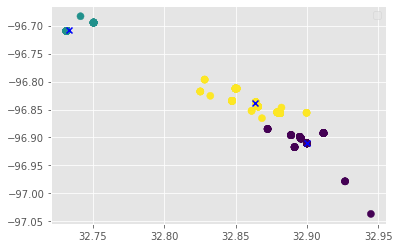

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


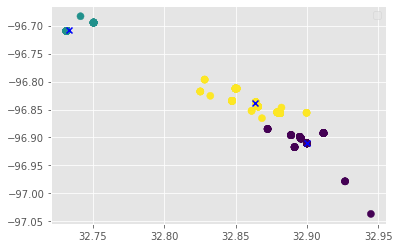

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


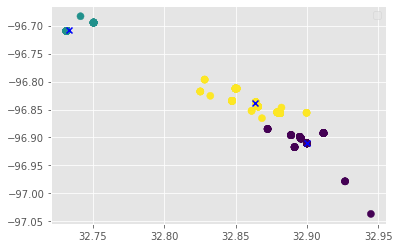

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster Analysis Inertia:  0.15891069523781087
------------------------------------------

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  0
    Tọa độ  [ 32.9000009  -96.90951639]
    #Số lượng  959

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  1
    Tọa độ  [ 32.73323174 -96.70816184]
    #Số lượng  306

  Cluster (Vị trí có thể là nhà hoặc nơi làm việc)  2
    Tọa độ  [ 32.86348712 -96.83818346]
    #Số lượng  140


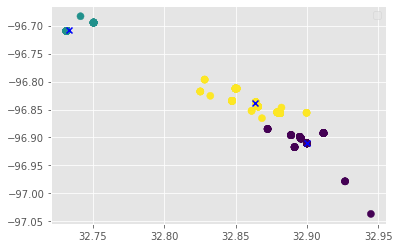

In [24]:
#TO DO:
for i in range(10):    
    user = data[data['In'] == unique_phone_no[i]].copy()    
    useful_features = ['TowerLat', 'TowerLon']

    user1_weekdays_daytime = user1[(user1['DOW'] != 'Sat') & (user1['DOW'] != 'Sun')].copy()
    user1_weekdays_daytime = user1_weekdays_daytime[(user1_weekdays_daytime['CallTime'] <= '17:00:00')]

    model = km.doKMeans(user1_weekdays_daytime, 3)
    km.clusterInfo(model) 
    centers = model.cluster_centers_
    plt.scatter(user1_weekdays_daytime['TowerLat'] , user1_weekdays_daytime['TowerLon'], c=model.labels_, s=50, cmap='viridis')
    plt.scatter(centers[:,0] , centers[:,1],  marker="x", color='b')
    plt.legend()
    plt.show()